In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла Excel, начиная с 11 строки, т.к. до этого ненужная инфа
df = pd.read_excel("Volgmed_2013.xlsx", header=None, skiprows=10)

# Добавление заголовков из 2 строки
headers = pd.read_excel("Volgmed_2013.xlsx", header=0, nrows=1).iloc[0].tolist()
df.columns = headers

In [40]:
# Выбор нужных столбцов
df = df[['Пол', 'Курс', 'Бег 100 м, с', 'Сила правой руки, кг', 'Сила левой руки, кг']]

# Оставляю только числовые данные
for col in ['Курс', 'Бег 100 м, с', 'Сила правой руки, кг', 'Сила левой руки, кг']:
    df = df[pd.to_numeric(df[col], errors='coerce').notna()]

# Удаление строк с NaN
df.dropna(subset=['Пол', 'Курс', 'Бег 100 м, с', 'Сила правой руки, кг', 'Сила левой руки, кг'], inplace=True)

# Фильтрация данных
df = df[(df['Пол'] == 'жен') & (df['Курс'] == 1) & (df['Бег 100 м, с'] < 18)]

# Вывод таблицы
print(df)

      Пол  Курс Бег 100 м, с  Сила правой руки, кг  Сила левой руки, кг
3     жен   1.0           15                  32.0                 28.0
6     жен   1.0         16.7                  24.0                 22.0
18    жен   1.0         15.3                  38.0                 28.0
21    жен   1.0         16.2                  32.0                 20.0
30    жен   1.0         16.2                  32.0                 16.0
...   ...   ...          ...                   ...                  ...
3939  жен   1.0         16.8                  20.0                 18.0
3941  жен   1.0         17.1                  21.0                 24.0
3945  жен   1.0         16.4                  20.0                 19.0
3947  жен   1.0         16.4                  19.0                 23.0
3949  жен   1.0         17.1                  18.0                 15.0

[466 rows x 5 columns]


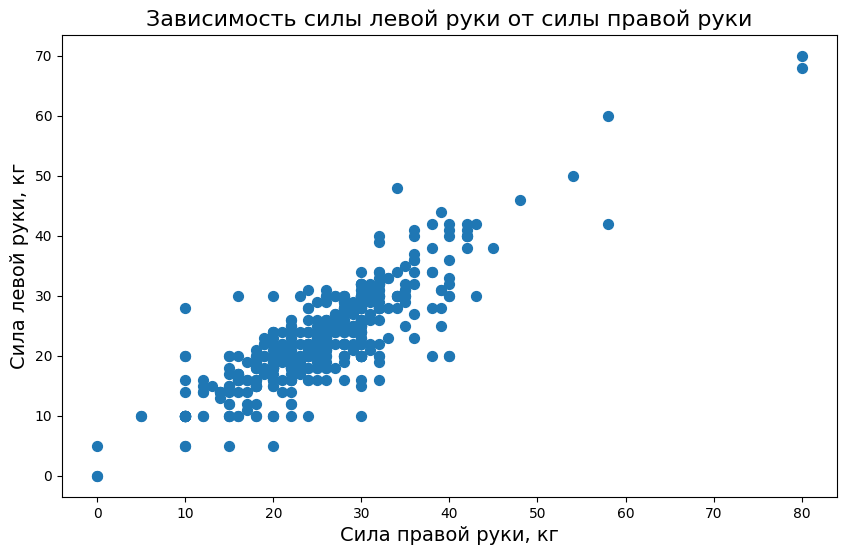

In [42]:
# Построение диаграммы
plt.figure(figsize=(10, 6))
plt.scatter(df['Сила правой руки, кг'], df['Сила левой руки, кг'], s=50)
plt.xlabel('Сила правой руки, кг', fontsize=14)
plt.ylabel('Сила левой руки, кг', fontsize=14)
plt.title('Зависимость силы левой руки от силы правой руки', fontsize=16)
plt.show()